# CIS 519 HW 2

In [1]:
import pandas as pd

import numpy as np
from numpy import linalg as LA
from numpy.linalg import *

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Linear Regression

In [2]:
'''
    Linear Regression via Gradient Descent
'''

class LinearRegression:

    def __init__(self, init_theta=None, alpha=0.01, n_iter=100):
        '''
        Constructor
        '''
        self.alpha = alpha
        self.n_iter = n_iter
        self.theta = init_theta
        self.JHist = None
    

    def gradientDescent(self, X, y, theta):
        '''
        Fits the model via gradient descent
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            theta is a d-dimensional numpy vector
        Returns:
            the final theta found by gradient descent
        '''
        n,d = X.shape
        self.JHist = []
        for i in range(self.n_iter):
            self.JHist.append( (self.computeCost(X, y, theta), theta) )
            print("Iteration: ", i+1, " Cost: ", self.JHist[i][0], " Theta.T: ", theta.T)
            yhat = X*theta
            theta = theta -  (X.T * (yhat - y)) * (self.alpha / n)
        return theta
    

    def computeCost(self, X, y, theta):
        '''
        Computes the objective function
        Arguments:
          X is a n-by-d numpy matrix
          y is an n-dimensional numpy vector
          theta is a d-dimensional numpy vector
        Returns:
          a scalar value of the cost  
              ** Not returning a matrix with just one value! **
        '''
        n,d = X.shape
        yhat = X*theta
        J =  (yhat-y).T * (yhat-y) / n
        J_scalar = J.tolist()[0][0]  # convert matrix to scalar
        return J_scalar
    

    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d Pandas Dataframe
            y is an n-dimensional Pandas Series
        '''
        n = len(y)
        X = X.to_numpy()
        X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term

        y = y.to_numpy()
        n,d = X.shape
        y = y.reshape(n,1)

        if self.theta is None:
            self.theta = np.matrix(np.zeros((d,1)))

        self.theta = self.gradientDescent(X,y,self.theta)   


    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d Pandas DataFrame
        Returns:
            an n-dimensional numpy vector of the predictions
        '''
        X = X.to_numpy()
        X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term
        return pd.DataFrame(X*self.theta)

### Test code for linear regression

In [3]:
def test_linreg(n_iter = 2000):
  # load the data
  filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw2-multivariateData.csv"
  df = pd.read_csv(filepath, header=None)

  X = df[df.columns[:-1]]
  y = df[df.columns[-1]]

  n,d = X.shape

  # # Standardize features
  from sklearn.preprocessing import StandardScaler
  standardizer = StandardScaler()
  X = pd.DataFrame(standardizer.fit_transform(X))  # compute mean and stdev on training set for standardization

  # # initialize the model
  init_theta = np.matrix(np.random.randn((d+1))).T
  alpha = 0.01

  # # Train the model
  lr_model = LinearRegression(init_theta = init_theta, alpha = alpha, n_iter = n_iter)
  lr_model.fit(X,y)

  # # Compute the closed form solution
  X = np.asmatrix(X.to_numpy())
  X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term
  y = np.asmatrix(y.to_numpy())
  n,d = X.shape
  y = y.reshape(n,1)
  thetaClosedForm = inv(X.T*X)*X.T*y
  print("thetaClosedForm: ", thetaClosedForm.T)

# Run the Linear Regression Test

In [4]:
test_linreg(2000)

Iteration:  1  Cost:  131183851935.56387  Theta.T:  [[-0.62341361 -1.50969434 -0.10913218]]
Iteration:  2  Cost:  128596291109.94377  Theta.T:  [[3403.50941627 1056.14734864  546.9886305 ]]
Iteration:  3  Cost:  126062758524.33594  Theta.T:  [[6773.60091785 2100.16425314 1082.69288297]]
Iteration:  4  Cost:  123582094106.38364  Theta.T:  [[10109.99150442  3130.74122047  1607.19394064]]
Iteration:  5  Cost:  121153163553.96805  Theta.T:  [[13413.01818512  4148.07538421  2120.67909471]]
Iteration:  6  Cost:  118774857738.77522  Theta.T:  [[16683.01459901  5152.36085786  2623.33265956]]
Iteration:  7  Cost:  116446092124.32501  Theta.T:  [[19920.31104876  6143.78878165  3115.33601947]]
Iteration:  8  Cost:  114165806198.09276  Theta.T:  [[23125.23453402  7122.54736875  3596.86767455]]
Iteration:  9  Cost:  111932962917.36661  Theta.T:  [[26298.10878443  8088.82195063  4068.10328598]]
Iteration:  10  Cost:  109746548168.49075  Theta.T:  [[29439.25429233  9042.79502181  4529.21572054]]
Iter

Iteration:  176  Cost:  8191152844.730121  Theta.T:  [[281776.49534351  79350.43682214  16952.2709029 ]]
Iteration:  177  Cost:  8116135043.652142  Theta.T:  [[282362.85698582  79519.6466314   16885.49998873]]
Iteration:  178  Cost:  8042559827.774259  Theta.T:  [[282943.35501171  79687.53823779  16818.44926426]]
Iteration:  179  Cost:  7970398675.8170595  Theta.T:  [[283518.04805733  79854.12639018  16751.1289091 ]]
Iteration:  180  Cost:  7899623640.341684  Theta.T:  [[284086.99417251  80019.42563296  16683.54891847]]
Iteration:  181  Cost:  7830207336.030738  Theta.T:  [[284650.25082653  80183.45030909  16615.7191062 ]]
Iteration:  182  Cost:  7762122928.212642  Theta.T:  [[285207.87491401  80346.21456317  16547.64910766]]
Iteration:  183  Cost:  7695344121.62423  Theta.T:  [[285759.92276061  80507.73234438  16479.34838266]]
Iteration:  184  Cost:  7629845149.406505  Theta.T:  [[286306.45012875  80668.01740943  16410.82621831]]
Iteration:  185  Cost:  7565600762.328684  Theta.T:  [[

Iteration:  329  Cost:  4409702249.474416  Theta.T:  [[327813.24616974  95495.46418797   6781.56095733]]
Iteration:  330  Cost:  4405093531.894066  Theta.T:  [[327939.24030379  95560.17636371   6726.09028423]]
Iteration:  331  Cost:  4400560597.047087  Theta.T:  [[328063.97449649  95624.55203528   6670.81195091]]
Iteration:  332  Cost:  4396102074.67214  Theta.T:  [[328187.46134727  95688.59349067   6615.72591826]]
Iteration:  333  Cost:  4391716620.630208  Theta.T:  [[328309.71332954  95752.30299522   6560.8321348 ]]
Iteration:  334  Cost:  4387402916.392825  Theta.T:  [[328430.74279199  95815.68279191   6506.13053684]]
Iteration:  335  Cost:  4383159668.540492  Theta.T:  [[328550.56195982  95878.73510164   6451.62104878]]
Iteration:  336  Cost:  4378985608.271065  Theta.T:  [[328669.18293596  95941.46212353   6397.30358335]]
Iteration:  337  Cost:  4374879490.917894  Theta.T:  [[328786.61770235  96003.86603519   6343.17804182]]
Iteration:  338  Cost:  4370840095.477566  Theta.T:  [[3

Iteration:  495  Cost:  4130163727.1175513  Theta.T:  [[ 3.38036954e+05  1.02858589e+05 -3.27126364e+01]]
Iteration:  496  Cost:  4129718044.3455796  Theta.T:  [[ 3.38060711e+05  1.02887828e+05 -6.12716592e+01]]
Iteration:  497  Cost:  4129277525.0600114  Theta.T:  [[ 3.38084230e+05  1.02916934e+05 -8.97088185e+01]]
Iteration:  498  Cost:  4128842099.0361977  Theta.T:  [[ 3.38107515e+05  1.02945908e+05 -1.18024591e+02]]
Iteration:  499  Cost:  4128411697.1616626  Theta.T:  [[ 3.38130566e+05  1.02974752e+05 -1.46219453e+02]]
Iteration:  500  Cost:  4127986251.4164715  Theta.T:  [[ 3.38153387e+05  1.03003464e+05 -1.74293878e+02]]
Iteration:  501  Cost:  4127565694.8539534  Theta.T:  [[ 3.38175980e+05  1.03032047e+05 -2.02248340e+02]]
Iteration:  502  Cost:  4127149961.581798  Theta.T:  [[ 3.38198347e+05  1.03060500e+05 -2.30083311e+02]]
Iteration:  503  Cost:  4126738986.743507  Theta.T:  [[ 3.38220490e+05  1.03088825e+05 -2.57799262e+02]]
Iteration:  504  Cost:  4126332706.500187  Theta

Iteration:  662  Cost:  4095458598.7336516  Theta.T:  [[339969.18356907 106301.74932097  -3435.46140114]]
Iteration:  663  Cost:  4095378271.5204806  Theta.T:  [[339973.61832913 106315.61061985  -3449.27350341]]
Iteration:  664  Cost:  4095298693.205294  Theta.T:  [[339978.00874158 106329.41064898  -3463.02510338]]
Iteration:  665  Cost:  4095219856.3456707  Theta.T:  [[339982.35524991 106343.14968228  -3476.71646298]]
Iteration:  666  Cost:  4095141753.5817804  Theta.T:  [[339986.65829315 106356.82799237  -3490.34784308]]
Iteration:  667  Cost:  4095064377.635315  Theta.T:  [[339990.91830597 106370.44585061  -3503.91950342]]
Iteration:  668  Cost:  4094987721.3084364  Theta.T:  [[339995.13571865 106384.00352712  -3517.4317027 ]]
Iteration:  669  Cost:  4094911777.4827456  Theta.T:  [[339999.31095721 106397.50129074  -3530.88469852]]
Iteration:  670  Cost:  4094836539.1182537  Theta.T:  [[340003.44444338 106410.9394091   -3544.27874744]]
Iteration:  671  Cost:  4094761999.252387  Theta

Iteration:  828  Cost:  4088579637.397888  Theta.T:  [[340329.03913798 107935.45992228  -5066.25022255]]
Iteration:  829  Cost:  4088561825.5116796  Theta.T:  [[340329.87534235 107942.11599773  -5072.90268018]]
Iteration:  830  Cost:  4088544171.5840416  Theta.T:  [[340330.70318467 107948.74276399  -5079.52588507]]
Iteration:  831  Cost:  4088526674.1971045  Theta.T:  [[340331.52274857 107955.34035037  -5086.11996564]]
Iteration:  832  Cost:  4088509331.9460597  Theta.T:  [[340332.33411683 107961.90888558  -5092.68504972]]
Iteration:  833  Cost:  4088492143.4390416  Theta.T:  [[340333.1373714  107968.44849775  -5099.2212646 ]]
Iteration:  834  Cost:  4088475107.2969894  Theta.T:  [[340333.93259343 107974.95931446  -5105.72873701]]
Iteration:  835  Cost:  4088458222.1535306  Theta.T:  [[340334.71986324 107981.44146271  -5112.20759314]]
Iteration:  836  Cost:  4088441486.654858  Theta.T:  [[340335.49926036 107987.89506895  -5118.65795861]]
Iteration:  837  Cost:  4088424899.4596066  Thet

Iteration:  1008  Cost:  4086971678.605437  Theta.T:  [[340398.96188054 108764.08388907  -5894.6559586 ]]
Iteration:  1009  Cost:  4086968062.3375154  Theta.T:  [[340399.09885748 108767.09252528  -5897.66438133]]
Iteration:  1010  Cost:  4086964477.8666162  Theta.T:  [[340399.23446465 108770.08792131  -5900.65956721]]
Iteration:  1011  Cost:  4086960924.912695  Theta.T:  [[340399.36871575 108773.07013544  -5903.64157447]]
Iteration:  1012  Cost:  4086957403.1981835  Theta.T:  [[340399.50162434 108776.0392257   -5906.61046107]]
Iteration:  1013  Cost:  4086953912.447965  Theta.T:  [[340399.63320384 108778.99524984  -5909.56628475]]
Iteration:  1014  Cost:  4086950452.389353  Theta.T:  [[340399.76346754 108781.93826538  -5912.50910295]]
Iteration:  1015  Cost:  4086947022.752075  Theta.T:  [[340399.89242861 108784.86832958  -5915.43897289]]
Iteration:  1016  Cost:  4086943623.2682447  Theta.T:  [[340400.02010007 108787.78549946  -5918.35595153]]
Iteration:  1017  Cost:  4086940253.672345

Iteration:  1192  Cost:  4086641284.086536  Theta.T:  [[340410.50419737 109144.08385937  -6274.6430022 ]]
Iteration:  1193  Cost:  4086640571.1442156  Theta.T:  [[340410.52575114 109145.42029871  -6275.97942971]]
Iteration:  1194  Cost:  4086639864.463479  Theta.T:  [[340410.54708938 109146.7508572   -6277.30997656]]
Iteration:  1195  Cost:  4086639163.989321  Theta.T:  [[340410.56821423 109148.07556074  -6278.63466864]]
Iteration:  1196  Cost:  4086638469.6672206  Theta.T:  [[340410.58912783 109149.39443509  -6279.9535317 ]]
Iteration:  1197  Cost:  4086637781.443132  Theta.T:  [[340410.6098323  109150.70750589  -6281.26659139]]
Iteration:  1198  Cost:  4086637099.26349  Theta.T:  [[340410.63032972 109152.01479869  -6282.57387325]]
Iteration:  1199  Cost:  4086636423.0751967  Theta.T:  [[340410.65062216 109153.31633891  -6283.87540271]]
Iteration:  1200  Cost:  4086635752.825622  Theta.T:  [[340410.67071169 109154.61215186  -6285.17120507]]
Iteration:  1201  Cost:  4086635088.4625974 

Iteration:  1350  Cost:  4086580248.7986264  Theta.T:  [[340412.21913725 109296.49189339  -6427.05034115]]
Iteration:  1351  Cost:  4086580071.8745527  Theta.T:  [[340412.22354162 109297.1576835   -6427.71613028]]
Iteration:  1352  Cost:  4086579896.5041428  Theta.T:  [[340412.22790195 109297.82054391  -6428.37898972]]
Iteration:  1353  Cost:  4086579722.673754  Theta.T:  [[340412.23221868 109298.48048752  -6429.03893236]]
Iteration:  1354  Cost:  4086579550.3698626  Theta.T:  [[340412.23649223 109299.13752715  -6429.69597105]]
Iteration:  1355  Cost:  4086579379.5790625  Theta.T:  [[340412.24072306 109299.79167558  -6430.35011856]]
Iteration:  1356  Cost:  4086579210.288066  Theta.T:  [[340412.24491157 109300.44294554  -6431.0013876 ]]
Iteration:  1357  Cost:  4086579042.483702  Theta.T:  [[340412.2490582  109301.09134969  -6431.64979086]]
Iteration:  1358  Cost:  4086578876.1529164  Theta.T:  [[340412.25316336 109301.73690065  -6432.29534093]]
Iteration:  1359  Cost:  4086578711.2827

Iteration:  1502  Cost:  4086565373.2879725  Theta.T:  [[340412.56397982 109370.39785088  -6500.95624119]]
Iteration:  1503  Cost:  4086565326.9921713  Theta.T:  [[340412.56493576 109370.73843022  -6501.29682044]]
Iteration:  1504  Cost:  4086565281.102909  Theta.T:  [[340412.56588215 109371.0775109   -6501.63590103]]
Iteration:  1505  Cost:  4086565235.616615  Theta.T:  [[340412.56681907 109371.41509951  -6501.97348955]]
Iteration:  1506  Cost:  4086565190.5297523  Theta.T:  [[340412.56774663 109371.75120262  -6502.30959258]]
Iteration:  1507  Cost:  4086565145.838813  Theta.T:  [[340412.56866491 109372.08582676  -6502.64421664]]
Iteration:  1508  Cost:  4086565101.5403185  Theta.T:  [[340412.569574   109372.41897845  -6502.97736824]]
Iteration:  1509  Cost:  4086565057.6308255  Theta.T:  [[340412.57047401 109372.75066416  -6503.30905387]]
Iteration:  1510  Cost:  4086565014.106915  Theta.T:  [[340412.57136501 109373.08089034  -6503.63927997]]
Iteration:  1511  Cost:  4086564970.96520

Iteration:  1667  Cost:  4086561331.325307  Theta.T:  [[340412.64136737 109410.40985845  -6540.96824341]]
Iteration:  1668  Cost:  4086561320.523263  Theta.T:  [[340412.64154944 109410.57437181  -6541.13275675]]
Iteration:  1669  Cost:  4086561309.816074  Theta.T:  [[340412.64172969 109410.73816125  -6541.29654619]]
Iteration:  1670  Cost:  4086561299.202908  Theta.T:  [[340412.64190814 109410.90122996  -6541.45961489]]
Iteration:  1671  Cost:  4086561288.68294  Theta.T:  [[340412.6420848  109411.06358112  -6541.62196604]]
Iteration:  1672  Cost:  4086561278.25535  Theta.T:  [[340412.6422597  109411.22521788  -6541.78360279]]
Iteration:  1673  Cost:  4086561267.919329  Theta.T:  [[340412.64243285 109411.38614338  -6541.94452829]]
Iteration:  1674  Cost:  4086561257.674071  Theta.T:  [[340412.64260426 109411.54636076  -6542.10474567]]
Iteration:  1675  Cost:  4086561247.5187793  Theta.T:  [[340412.64277397 109411.70587313  -6542.26425803]]
Iteration:  1676  Cost:  4086561237.452665  The

Iteration:  1824  Cost:  4086560409.2102194  Theta.T:  [[340412.65581639 109429.08874172  -6559.64712627]]
Iteration:  1825  Cost:  4086560406.5055413  Theta.T:  [[340412.65585397 109429.17106186  -6559.72944641]]
Iteration:  1826  Cost:  4086560403.824614  Theta.T:  [[340412.65589117 109429.25301976  -6559.81140431]]
Iteration:  1827  Cost:  4086560401.1672277  Theta.T:  [[340412.655928   109429.33461702  -6559.89300158]]
Iteration:  1828  Cost:  4086560398.533178  Theta.T:  [[340412.65596447 109429.41585523  -6559.97423978]]
Iteration:  1829  Cost:  4086560395.922257  Theta.T:  [[340412.65600057 109429.49673596  -6560.05512051]]
Iteration:  1830  Cost:  4086560393.334264  Theta.T:  [[340412.65603631 109429.57726079  -6560.13564534]]
Iteration:  1831  Cost:  4086560390.7689962  Theta.T:  [[340412.65607169 109429.65743128  -6560.21581584]]
Iteration:  1832  Cost:  4086560388.226256  Theta.T:  [[340412.65610672 109429.737249    -6560.29563355]]
Iteration:  1833  Cost:  4086560385.705844

Iteration:  1954  Cost:  4086560199.0624104  Theta.T:  [[340412.65855695 109437.25168101  -6567.81006553]]
Iteration:  1955  Cost:  4086560198.203103  Theta.T:  [[340412.65856713 109437.29808154  -6567.85646606]]
Iteration:  1956  Cost:  4086560197.3513393  Theta.T:  [[340412.6585772  109437.34427789  -6567.90266241]]
Iteration:  1957  Cost:  4086560196.507056  Theta.T:  [[340412.65858717 109437.39027096  -6567.94865548]]
Iteration:  1958  Cost:  4086560195.6701856  Theta.T:  [[340412.65859705 109437.43606165  -6567.99444617]]
Iteration:  1959  Cost:  4086560194.8406644  Theta.T:  [[340412.65860682 109437.48165084  -6568.04003536]]
Iteration:  1960  Cost:  4086560194.018429  Theta.T:  [[340412.6586165  109437.52703943  -6568.08542395]]
Iteration:  1961  Cost:  4086560193.2034135  Theta.T:  [[340412.65862608 109437.57222829  -6568.13061281]]
Iteration:  1962  Cost:  4086560192.395552  Theta.T:  [[340412.65863556 109437.6172183   -6568.17560283]]
Iteration:  1963  Cost:  4086560191.59478

# Polynomial Regression

In [1]:
import pandas as pd

import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#-----------------------------------------------------------------
#  Class PolynomialRegression
#-----------------------------------------------------------------

class PolynomialRegression:

    def __init__(self, degree = 1, regLambda = 1E-8
                 , tuneLambda = False, regLambdaValues = []):
        '''
        Constructor
        '''
        self.degree = degree
        self.regLambda = regLambda
        self.tuneLambda = tuneLambda
        self.regLambdaValues = regLambdaValues
        self.theta = np.zeros(degree+1).reshape(-1,1)
        
#         # autograder parameter
#         self.alpha = 0.25
#         self.thresh = 1E-4
        
        # self program parameter
        self.alpha = 0.1
        self.thresh = 1E-2
        
        self.mean = np.zeros((degree,1))
        self.std = np.zeros((degree,1))
        self.is_tuning = False
        self.tune_iter = 500000
        self.kfold = 5
        self.trial = 5


    def polyfeatures(self, X, degree):
        '''
        Expands the given X into an n * d array of polynomial features of
            degree d.

        Returns:
            A n-by-d data frame, with each column comprising of
            X, X * X, X ** 3, ... up to the dth power of X.
            Note that the returned matrix will not include the zero-th power.

        Arguments:
            X is an n-by-1 data frame
            degree is a positive integer
        '''
        base = X.to_numpy()
        for i in range(degree):
            if i == 0:
                poly_feat = base
            else:
                poly_feat = np.c_[poly_feat,base**(i+1)]
        return pd.DataFrame(poly_feat)
        

    def fit(self, X, y):
        '''
            Trains the model
            Arguments:
                X is a n-by-1 data frame
                y is an n-by-1 data frame
            Returns:
                No return value
            Note:
                You need to apply polynomial expansion and scaling first
        '''
        X = self.polyfeatures(X,self.degree)
        X = self.standardizeTrain(X)
        X = X.to_numpy()
        y = y.to_numpy()
        n = len(y)
        X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term
        
        if self.tuneLambda and self.regLambdaValues != []:
            self.is_tuning = True
            
            # use sklearn Ridge
            model = Ridge()
            grid = GridSearchCV(estimator = model,
                                param_grid = dict(alpha = self.regLambdaValues))
            grid.fit(X,y.reshape(-1,1))
            self.regLambda = grid.best_params_.get('alpha')
            
#            # use self programmed cross validation
#            self.regLambda = self.findLambda(X,y.reshape(-1,1),self.theta)
            
            print(f'best lambda: {self.regLambda}')
            self.is_tuning = False

        self.theta, cost = self.gradientDescent(X,y,self.theta,self.regLambda)
        print(f'cost: {cost}')
        
    def findLambda(self, X, y, theta):
        '''
        Find the best regularization lambda
        Arguments:
          X is a n-by-d numpy array
          y is an n-dimensional numpy vector
          theta is a d-dimensional numpy vector
        Returns:
          a scalar value representing the best lambda
        '''
        min_cost = 1E8
        best_lambda = 0
        for regLambda in self.regLambdaValues:
            cur_cost = self.regPerformance(X, y, theta, regLambda)
            print(f'lambda: {regLambda}, cost:{cur_cost}')
            if cur_cost < min_cost:
                min_cost = cur_cost
                best_lambda = regLambda
        return best_lambda
    
    def regPerformance(self, X, y, theta, regLambda):
        '''
        Calculate the coefficient of the prediction
        Arguments:
          X is a n-by-d numpy array
          y is an n-dimensional numpy vector
          theta is a d-dimensional numpy vector
        Returns:
          a scalar value representing the coefficient
        '''
#        total_coef = 0
        total_cost = 0
        y = y.reshape(-1)
        
        rkf = RepeatedKFold(n_splits=self.kfold,
                            n_repeats=self.trial, random_state=0)
        for train_index, test_index in rkf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            cur_theta, _ = self.gradientDescent(X_train,
                                    y_train, theta, regLambda)
            yhat = np.dot(X_test, cur_theta).reshape(-1)
            
            # criterion 1: cost
            cost = np.linalg.norm(yhat - y_test)/len(y_test)
            total_cost += cost

#            # criterion 2: coefficience
#            u = np.sum((yhat - y_test)**2)
#            v = np.sum((y_test-y_test.mean())**2)
#            coef = 1-u/v
#            total_coef += coef
            
        return (total_cost)
        
        
    def predict(self, X):
        '''
        Use the trained model to predict values for each instance in X
        Arguments:
            X is a n-by-1 data frame
        Returns:
            an n-by-1 data frame of the predictions
        '''
        X = self.polyfeatures(X,self.degree)
        X = self.standardizeTest(X)
        X = X.to_numpy()
        n = X.shape[0]
        X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term
        
        return pd.DataFrame(np.dot(X,self.theta))
    
    def standardizeTrain(self, X):
        '''
        standardize the training data before training or predicting
        Arguments:
            X is a n-by-d data frame
        Returns:
            an n-by-d data frame of the predictions
        '''
        X = X.to_numpy()
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        standard = (X - self.mean) / self.std
        return pd.DataFrame(standard)
    
    def standardizeTest(self, X):
        '''
        standardize the test data before training or predicting
        Arguments:
            X is a n-by-d data frame
        Returns:
            an n-by-d data frame of the predictions
        '''
        X = X.to_numpy()
        standard = (X - self.mean) / self.std
        return pd.DataFrame(standard)
    
    def computeCost(self, X, y, theta, regLambda):
        '''
        Computes the objective function
        Arguments:
          X is a n-by-d numpy array
          y is an n-dimensional numpy vector
          theta is a d-dimensional numpy vector
          regLambda is a scalar
        Returns:
          a scalar value of the cost  
              ** Not returning a matrix with just one value! **
        '''
        n,d = X.shape
        yhat = np.dot(X,theta)
        y = y.reshape(-1,1)
        J = np.dot((yhat-y).T,(yhat-y))/n + regLambda * np.sum(theta[1:]**2)
        J_scalar = J.tolist()[0][0]  # convert matrix to scalar
        return J_scalar
    
    def gradientDescent(self, X, y, theta, regLambda):
        '''
        Fits the model via gradient descent
        Arguments:
            X is a n-by-d numpy array
            y is an n-dimensional numpy vector
            theta is a d-dimensional numpy vector
            regLambda is a scalar
        Returns:
            the final theta found by gradient descent
        '''
        n,d = X.shape
        y = y.reshape(-1,1)
        iter_num = 0
        last_cost = 1E8
        last_theta = self.theta
        while True:
            # compute cost
            cost = self.computeCost(X, y, theta, regLambda)
            
            # gradient descent
            yhat = np.dot(X,theta)
            theta = theta - np.dot(X.T, (yhat-y)) * (self.alpha / n)
            theta[1:] = theta[1:] * (1 - self.alpha * regLambda)
            
            # judge convergence
            L2_criterion = np.linalg.norm(theta - last_theta)
            cost_criterion = abs(cost - last_cost)
            
            if L2_criterion <= self.thresh:
#             if cost_criterion < self.thresh:
                break
            
            if self.is_tuning is True and iter_num > self.tune_iter:
                break
            
            # update
            iter_num += 1
            last_theta = theta
            last_cost = cost
        return theta, cost

# Test Polynomial Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def test_polyreg_univariate():
    '''
        Test polynomial regression
    '''

    # load the data
    filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw2-polydata.csv"
    df = pd.read_csv(filepath, header=None)

    X = df[df.columns[:-1]]
    y = df[df.columns[-1]]

    # regression with degree = d
    d = 8
    
    # no regularization
    model = PolynomialRegression(degree = d, regLambda = 0)
    model.fit(X, y)
    
    # output predictions
    xpoints = pd.DataFrame(np.linspace(np.max(X), np.min(X), 100))
    ypoints = model.predict(xpoints)

    # plot curve
    plt.figure(1,figsize=(16,9))
    plt.plot(X, y, 'rx')
    plt.title('Regularization Parameter $\lambda$ = 0',fontsize=22)
    plt.plot(xpoints, ypoints, 'b-')
    plt.xlabel('X',fontsize=22)
    plt.ylabel('Y',fontsize=22)
    plt.show()
    
    # tune the hyperparameter
    lambda_list = list([0, 0.001, 0.003, 0.006, 0.01,
                       0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 10])
    model = PolynomialRegression(degree = d, regLambda = 0.0001,
                tuneLambda = True, regLambdaValues = lambda_list)
    model.fit(X, y)
    
    # output predictions
    xpoints = pd.DataFrame(np.linspace(np.max(X), np.min(X), 100))
    ypoints = model.predict(xpoints)

    # plot curve
    plt.figure(2,figsize=(16,9))
    plt.plot(X, y, 'rx')
    plt.title('Regularization Parameter $\lambda$ = '+str(model.regLambda)
                ,fontsize=22)
    plt.plot(xpoints, ypoints, 'b-')
    plt.xlabel('X',fontsize=22)
    plt.ylabel('Y',fontsize=22)
    plt.show()

cost: 155.61688566789417


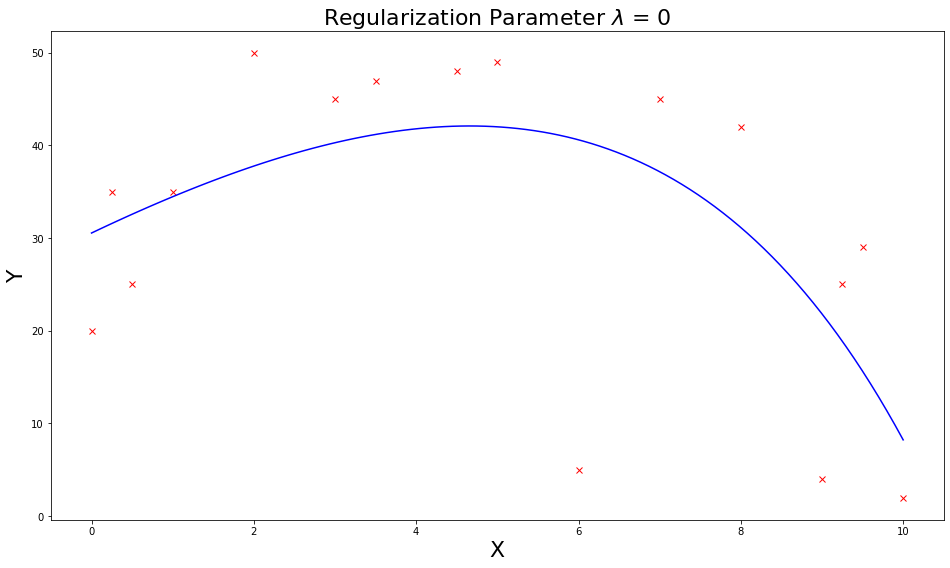

best lambda: 0.01
cost: 160.97197480599618


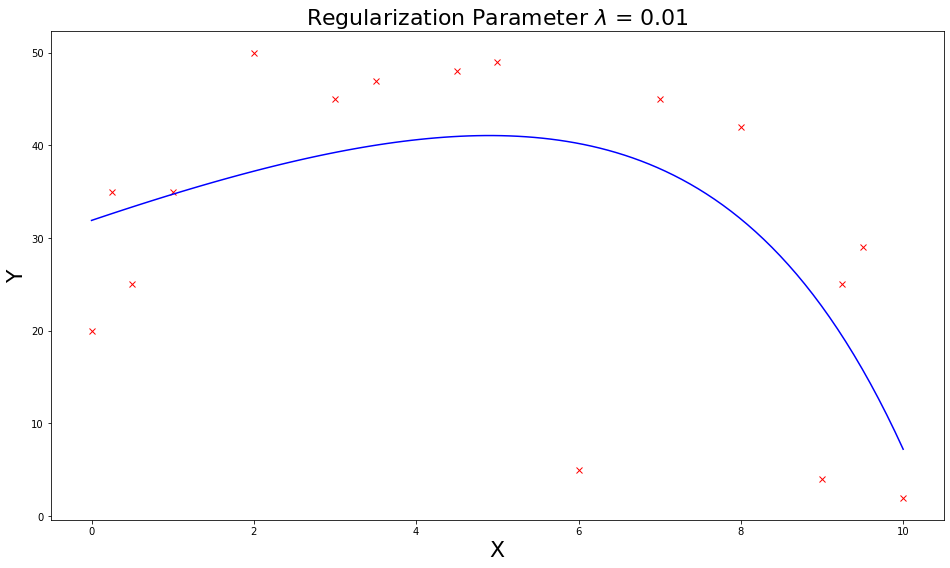

In [3]:
test_polyreg_univariate()